<a href="https://colab.research.google.com/github/amitadhainje/LearningBERT/blob/master/MukeshSir_Module_2_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Module-2-Dataset.xlsx to Module-2-Dataset.xlsx


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from bs4 import BeautifulSoup
from sklearn.utils import shuffle
from prettytable import PrettyTable,ALL
import nltk
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras import backend as K
import tensorflow_hub as hub
import tensorflow as tf
from textwrap import TextWrapper
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')
wrapper = TextWrapper(width=55)
%matplotlib inline

print ("Tensorflow version ===", tf.__version__)
print ("Tensorflow hub version ===", hub.__version__)

Tensorflow version === 2.12.0
Tensorflow hub version === 0.13.0


In [2]:
df = pd.read_excel("Module-2-Dataset.xlsx")
df.head()

,Sentiment,Text
0,shame,When I did not speak the truth.
1,shame,When I could not remember what to say about a ...
2,shame,When I realized that I was directing the feeli...
3,shame,"When I was tired and unmotivated, I shouted at..."
4,shame,"When one has been unjust, stupid towards someo..."


In [3]:
def clean_input_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z.]+', " ", text)
    text = re.sub(r'gt', " ", text)
    contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in text.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)
    text = ' '.join(q_decontracted)

    return text

In [4]:
df['cleaned_text'] = df['Text'].apply(lambda x: clean_input_text(x))
df['max_length'] = df['Text'].apply(lambda x: len(x.split(" ")))
df.head()

,Sentiment,Text,cleaned_text,max_length
0,shame,When I did not speak the truth.,when i did not speak the truth.,7
1,shame,When I could not remember what to say about a ...,when i could not remember what to say about a ...,16
2,shame,When I realized that I was directing the feeli...,when i realized that i was directing the feeli...,34
3,shame,"When I was tired and unmotivated, I shouted at...",when i was tired and unmotivated i shouted at ...,26
4,shame,"When one has been unjust, stupid towards someo...",when one has been unjust stupid towards someon...,10


In [5]:
sentimentCodes = {'shame':0, 'guilt':1, 'disgust':2, 'surprise':3}
df['Sentiment'] = [sentimentCodes[i] for i in df['Sentiment']]
df.head()

,Sentiment,Text,cleaned_text,max_length
0,0,When I did not speak the truth.,when i did not speak the truth.,7
1,0,When I could not remember what to say about a ...,when i could not remember what to say about a ...,16
2,0,When I realized that I was directing the feeli...,when i realized that i was directing the feeli...,34
3,0,"When I was tired and unmotivated, I shouted at...",when i was tired and unmotivated i shouted at ...,26
4,0,"When one has been unjust, stupid towards someo...",when one has been unjust stupid towards someon...,10


In [6]:
# !pip install transformers
# Detect hardware, return appropriate distribution strategy
try:
    # TPU detection. No parameters necessary if TPU_NAME environment variable is
    # set: this is always the case on Kaggle.
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
    strategy = tf.distribute.get_strategy()

print("REPLICAS: ", strategy.num_replicas_in_sync)

REPLICAS:  1


In [7]:
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from keras.utils import pad_sequences


X = df['cleaned_text'].values
y = df['Sentiment'].values
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(y)
n_classes = 4

n_most_common_words = 2500
max_len = max(df['max_length'])
tokenizer = Tokenizer(num_words=n_most_common_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

X = pad_sequences(sequences, maxlen=max_len)
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.30, random_state=42)

print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

Found 10179 unique tokens.
(13136, 187)
(5630, 187)
(13136, 4)
(5630, 4)


In [8]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout, GRU

vocab_len = n_most_common_words
emb_dim = 256
gru_model = Sequential()
gru_model.add(Embedding(vocab_len, emb_dim, trainable = True))
gru_model.add(GRU(256, return_sequences=False))
gru_model.add(Dropout(0.5))
gru_model.add(Dense(4, activation = 'softmax'))
gru_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(gru_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 256)         640000    
                                                                 
 gru (GRU)                   (None, 256)               394752    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 4)                 1028      
                                                                 
Total params: 1,035,780
Trainable params: 1,035,780
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
%%time
history = gru_model.fit(X_train, y_train, epochs=5, batch_size=2000)

Epoch 1/5
7/7 [==============================] - 151s 18s/step - loss: 1.3683 - accuracy: 0.3442
Epoch 2/5
7/7 [==============================] - 126s 17s/step - loss: 1.2492 - accuracy: 0.5010
Epoch 3/5
7/7 [==============================] - 124s 17s/step - loss: 1.0828 - accuracy: 0.5792
Epoch 4/5
7/7 [==============================] - 124s 17s/step - loss: 0.8603 - accuracy: 0.6431
Epoch 5/5
7/7 [==============================] - 123s 17s/step - loss: 0.6935 - accuracy: 0.7169
CPU times: user 16min 52s, sys: 46.3 s, total: 17min 39s
Wall time: 11min 28s


176/176 [==============================] - 30s 173ms/step
Following are the evaluation matrices for GRU Model - 

+---------------------------+------------------+
|            Name           |      Score       |
+---------------------------+------------------+
|     Training Accuracy     |     75.3806%     |
|      Testing Accuracy     |     71.5098%     |
|          F1-Score         |      0.7151      |
|      Precision Score      |      0.7034      |
|        Recall Score       |      0.7151      |
+---------------------------+------------------+


CPU times: user 2min 28s, sys: 4.68 s, total: 2min 33s
Wall time: 2min 3s


[Text(0, 0.5, 'Shame'),
 Text(0, 1.5, 'Guilt'),
 Text(0, 2.5, 'Disgust'),
 Text(0, 3.5, 'Surprise')]

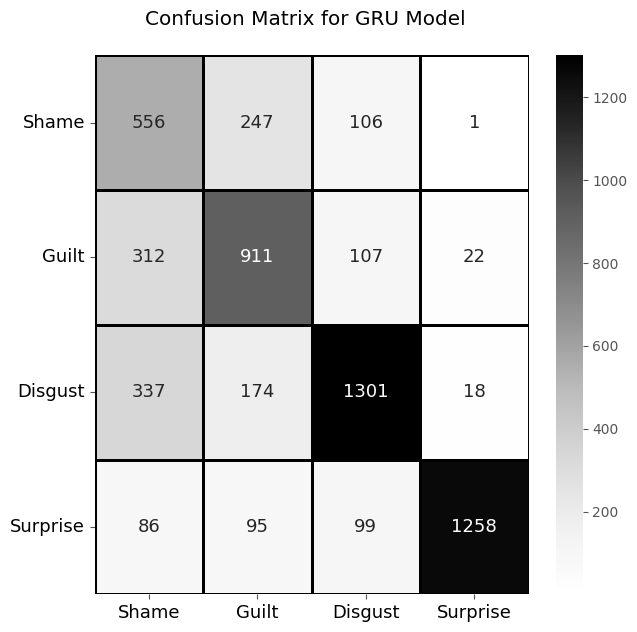

In [10]:
%%time
from sklearn.metrics import accuracy_score, classification_report, roc_curve, confusion_matrix, roc_auc_score, auc
from sklearn.metrics import f1_score, precision_score, recall_score

training_predictions = gru_model.predict(X_train)
testing_predictions = gru_model.predict(X_test)

predictions = np.argmax(testing_predictions, axis=1)
actuals = np.argmax(y_test, axis=1)

train_predictions = np.argmax(training_predictions, axis=1)
train_actuals = np.argmax(y_train, axis=1)

training_accuracy = accuracy_score(train_actuals, train_predictions) * 100
testing_accuracy = accuracy_score(actuals, predictions) * 100
f1score =  f1_score(actuals, predictions, average="micro")
precision = precision_score(actuals, predictions, average='macro')
recall = recall_score(actuals, predictions, average='micro')

print ("Following are the evaluation matrices for GRU Model - \n")

x = PrettyTable(padding_width=5)
x.field_names = [" Name ", "Score"]
x.add_row(['Training Accuracy', str((round(training_accuracy ,4)))+'%'])
x.add_row(['Testing Accuracy', str((round(testing_accuracy ,4)))+'%'])
x.add_row(['F1-Score', str((round(f1score,4)))])
x.add_row(['Precision Score', str(round(precision, 4))])
x.add_row(['Recall Score', str(round(recall, 4))])
print (x)
print ("\n")

cm = confusion_matrix(predictions, actuals)

classNames = ['Shame','Guilt', 'Disgust', 'Surprise']
labels = [0,1,2,3]

plt.figure(figsize=(7,7))
ax= plt.subplot()
df_cm = pd.DataFrame(cm)
sns.heatmap(df_cm, annot=True, ax = ax, cmap="Greys", fmt='g',linewidth=2,linecolor='black', annot_kws={"size": 13}); #annot=True to annotate cells

ax.set_title('Confusion Matrix for GRU Model  \n');
ax.xaxis.set_ticklabels(classNames, rotation=0, fontsize="13", va="top", color='black');
ax.yaxis.set_ticklabels(classNames, rotation=0, fontsize="13", va="center", color='black');

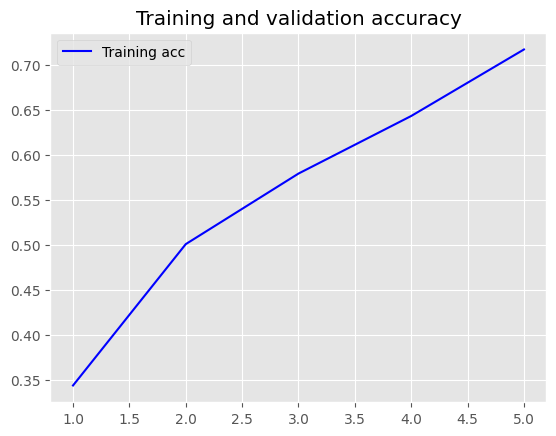

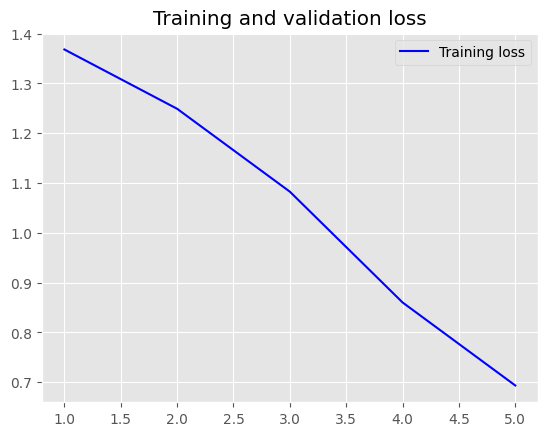

In [11]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


 Following is the Classification Report for GRU Model - 


[Text(0.5, 0, 'Precision'), Text(1.5, 0, 'F1-Score'), Text(2.5, 0, 'Recall')]

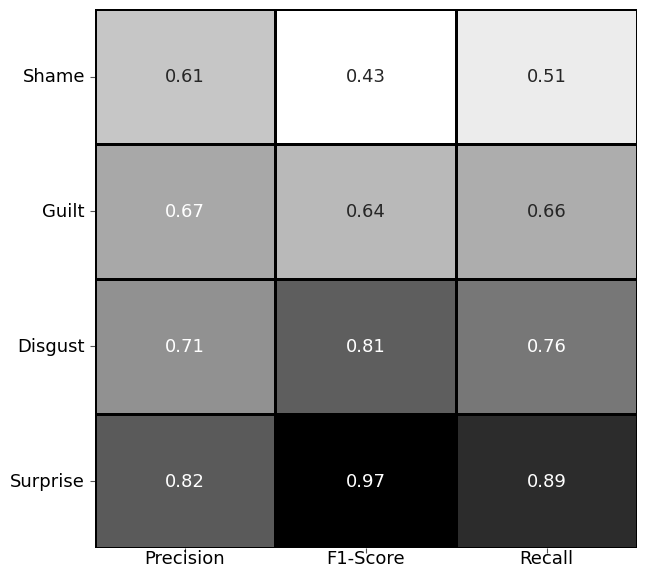

In [12]:
import sys,re
print ("\n Following is the Classification Report for GRU Model - ")
cf_report = classification_report(actuals, predictions)

def classification_report_to_dataframe(cf_report):
    report_data = []
    lines = cf_report.split('\n')
    for line in lines[2:-3]:
        newline = re.sub(r' +',",",line)
        row_data = newline.split(",")
        if(len(row_data) == 6):
            row = {}
            row['precision'] = float(row_data[2])
            row['recall'] = float(row_data[3])
            row['f1_score'] = float(row_data[4])
            report_data.append(row)
    dataframe = pd.DataFrame.from_dict(report_data)
    return dataframe

reqDataFrame = classification_report_to_dataframe(cf_report)

classNames = ['Shame','Guilt', 'Disgust', 'Surprise']
labels = [0,1,2,3]

plt.figure(figsize=(7,7))
ax= plt.subplot()
sns.heatmap(reqDataFrame, annot=True, ax = ax, cmap="Greys", cbar=False, linewidths=2, linecolor='black', annot_kws={"size": 13}); #annot=True to annotate cells
ax.yaxis.set_ticklabels(classNames, rotation=0, fontsize="13", va="center", color='black')
ax.xaxis.set_ticklabels(['Precision', 'F1-Score', 'Recall'], rotation=0, fontsize="13", va="center", color='black')

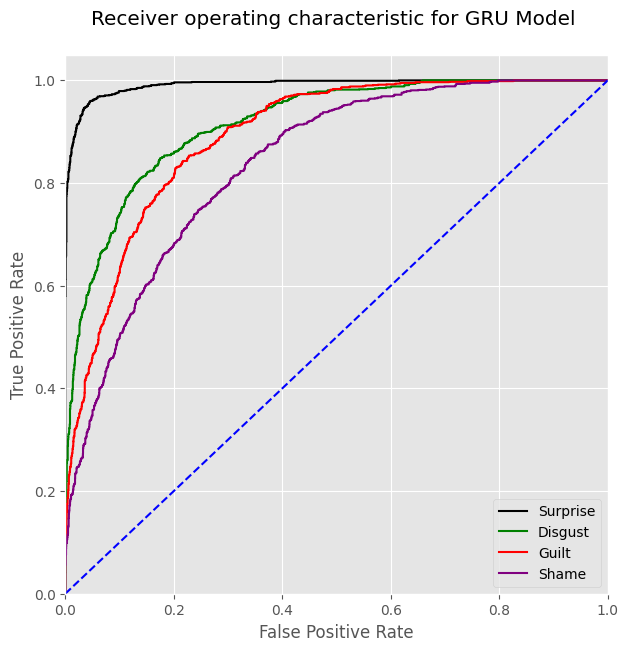

In [13]:
n_classes = 4
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], testing_predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(7,7))
plt.plot(fpr[3], tpr[3], color='Black', label = "Surprise")
plt.plot(fpr[2], tpr[2], color='green', label = "Disgust")
plt.plot(fpr[1], tpr[1], color='red', label = "Guilt")
plt.plot(fpr[0], tpr[0], color='purple', label = "Shame")
plt.plot([0, 1], [0, 1], color='Blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for GRU Model \n')
plt.legend(loc="lower right")
plt.show()